# Seattle Crime

In [1]:
import pandas as pd
import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data Exploration and Data Preprocessing

In [2]:
with open("./data/raw/seattlecrime.arff", "r") as f:
    data = arff.load(f)

df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

In [3]:
df.head()

,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1.975000e+12,900.0,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
1,1.976000e+12,1.0,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,None,None,UNKNOWN
2,1.979000e+12,1600.0,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,1.981000e+13,2029.0,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1.981000e+12,2000.0,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS


In [4]:

df.replace('UNKNOWN', np.nan, inplace=True)

# Check for missing values (NaN or NA) again
missing_values_with_unknown = df.isna().sum()

print("Missing Values with 'UNKNOWN' treated as NaN:")
print(missing_values_with_unknown)

Missing Values with 'UNKNOWN' treated as NaN:
Report_Number                     0
Occurred_Time                     2
Reported_Time                     2
Crime_Subcategory               262
Primary_Offense_Description       0
Precinct                       3352
Sector                         3346
Beat                           3298
Neighborhood                   3366
dtype: int64


In [5]:
df.shape

(523590, 9)

In [6]:
df.dtypes

Report_Number                  float64
Occurred_Time                  float64
Reported_Time                  float64
Crime_Subcategory               object
Primary_Offense_Description     object
Precinct                        object
Sector                          object
Beat                            object
Neighborhood                    object
dtype: object

In [7]:
# Assuming df is your DataFrame
number_of_unique_values_in_each_column = df.nunique()

print("Number of Unique Values in Each Column:")
print(number_of_unique_values_in_each_column)



Number of Unique Values in Each Column:
Report_Number                  523590
Occurred_Time                    1440
Reported_Time                    1440
Crime_Subcategory                  30
Primary_Offense_Description       144
Precinct                            5
Sector                             23
Beat                               64
Neighborhood                       58
dtype: int64


In [8]:
df.shape

(523590, 9)

In [9]:
numerical_stats = df.describe()

print("Descriptive Statistics for Numerical Features:")
numerical_stats


Descriptive Statistics for Numerical Features:


,Report_Number,Occurred_Time,Reported_Time
count,5.235900e+05,523588.000000,523588.000000
mean,1.634633e+13,1358.650429,1353.362726
std,7.421096e+12,688.348689,589.368521
min,2.008000e+08,0.000000,0.000000
25%,2.008000e+13,900.000000,950.000000
50%,2.012000e+13,1500.000000,1407.000000
75%,2.016000e+13,1920.000000,1817.000000
max,2.019000e+13,2359.000000,2359.000000


### Missing Values

In [10]:
total_values = df.size
missing_values = df.isnull().sum().sum()
percentage_missing = (missing_values / total_values) * 100

print("Percentage of missing values in the DataFrame: {:.2f}%".format(percentage_missing))

# For a specific column
for column in df.columns:
    total_values_column = len(df[column])
    missing_values_column = df[column].isnull().sum()
    percentage_missing_column = (missing_values_column / total_values_column) * 100

    print("Percentage of missing values in column '{}': {:.2f}%".format(column, percentage_missing_column))


Percentage of missing values in the DataFrame: 0.29%
Percentage of missing values in column 'Report_Number': 0.00%
Percentage of missing values in column 'Occurred_Time': 0.00%
Percentage of missing values in column 'Reported_Time': 0.00%
Percentage of missing values in column 'Crime_Subcategory': 0.05%
Percentage of missing values in column 'Primary_Offense_Description': 0.00%
Percentage of missing values in column 'Precinct': 0.64%
Percentage of missing values in column 'Sector': 0.64%
Percentage of missing values in column 'Beat': 0.63%
Percentage of missing values in column 'Neighborhood': 0.64%


In [11]:
mask = df.isnull().sum(axis=1) >= 2
missing_3_col = df[mask]
missing_3_count= len(missing_3_col)
percentage_3_missing = (len(missing_3_col) / len(df)) * 100  # Calculate percentage based on the total number of rows in the DataFrame
print('There are {} row which is {:.2f}% with missing 2 or more columns from the dataset'.format(missing_3_count ,percentage_3_missing))
missing_3_col


There are 3355 row which is 0.64% with missing 2 or more columns from the dataset


,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
1,1.976000e+12,1.0,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,NaN,None,None,NaN
9,1.999000e+13,NaN,NaN,THEFT-SHOPLIFT,THEFT-SHOPLIFT,NaN,None,None,NaN
19,2.004000e+13,0.0,1650.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NaN,None,None,NaN
60,2.007000e+13,1824.0,0.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NaN,None,None,NaN
86,2.007000e+13,430.0,2145.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...
522729,2.019000e+13,1200.0,845.0,THEFT-ALL OTHER,THEFT-OTH,NaN,None,None,NaN
522732,2.019000e+13,1310.0,2316.0,THEFT-ALL OTHER,THEFT-OTH,NaN,None,None,NaN
522916,2.019000e+12,1539.0,1539.0,TRESPASS,TRESPASS,NaN,None,None,NaN
523222,2.019000e+12,2300.0,1407.0,THEFT-ALL OTHER,THEFT-PKPOCKET,NaN,None,None,NaN


In [12]:

def preprocess_dataset(df):
    """
    Preprocess the dataset by filling missing values and dropping rows with more than 3 missing values.

    Parameters:
    df (DataFrame): The input DataFrame to be preprocessed.

    Returns:
    DataFrame: Preprocessed DataFrame.
    """
    df_copy = df.copy()
    
    df_copy.loc[df_copy['Primary_Offense_Description'] == 'BURGLARY-OTHER', 'Crime_Subcategory'] = 'OTHER BURGLARYS'
    df_copy.loc[df_copy['Primary_Offense_Description'] == 'ROBBERY-OTHER', 'Crime_Subcategory'] = 'OTHER ROBBERY'
    
    neighborhood_by_precinct = df_copy.groupby('Precinct')['Neighborhood'].agg(lambda x: x.value_counts().index[0])

    for index, row in df_copy[df_copy['Neighborhood'].isnull()].iterrows():
        if row['Precinct'] in neighborhood_by_precinct:
            df_copy.at[index, 'Neighborhood'] = neighborhood_by_precinct[row['Precinct']]
    
    precinct_by_neighborhood = df_copy.groupby('Neighborhood')['Precinct'].agg(lambda x: x.value_counts().index[0])

    for index, row in df_copy[df_copy['Precinct'].isnull()].iterrows():
        if row['Neighborhood'] in precinct_by_neighborhood:
            df_copy.at[index, 'Precinct'] = precinct_by_neighborhood[row['Neighborhood']]
            
    beat_by_precinct = df_copy.groupby('Precinct')['Beat'].agg(lambda x: x.value_counts().index[0])

    for index, row in df_copy[df_copy['Beat'].isnull()].iterrows():
        if row['Precinct'] in beat_by_precinct:
            df_copy.at[index, 'Beat'] = beat_by_precinct[row['Precinct']]
    
    mask = df_copy.isnull().sum(axis=1) >= 1
    df_copy = df_copy.drop(df_copy[mask].index)
    
    return df_copy




In [13]:
df_copy= preprocess_dataset(df)
df_copy.isna().sum()

Report_Number                  0
Occurred_Time                  0
Reported_Time                  0
Crime_Subcategory              0
Primary_Offense_Description    0
Precinct                       0
Sector                         0
Beat                           0
Neighborhood                   0
dtype: int64

In [14]:
df_copy.head()

,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1.975000e+12,900.0,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
2,1.979000e+12,1600.0,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,1.981000e+13,2029.0,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1.981000e+12,2000.0,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,1.988000e+13,155.0,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE


In [15]:
df_copy.shape


(520240, 9)

#### Using feature engineering to derive the severity of a crime

In [16]:
df_copy['Crime_Subcategory'].unique()

array(['BURGLARY-RESIDENTIAL', 'CAR PROWL', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'THEFT-ALL OTHER', 'DUI',
       'AGGRAVATED ASSAULT-DV', 'RAPE', 'SEX OFFENSE-OTHER',
       'AGGRAVATED ASSAULT', 'ROBBERY-STREET', 'BURGLARY-COMMERCIAL',
       'THEFT-BICYCLE', 'NARCOTIC', 'PROSTITUTION', 'ARSON',
       'PORNOGRAPHY', 'ROBBERY-COMMERCIAL', 'FAMILY OFFENSE-NONVIOLENT',
       'THEFT-SHOPLIFT', 'WEAPON', 'THEFT-BUILDING', 'TRESPASS',
       'LIQUOR LAW VIOLATION', 'ROBBERY-RESIDENTIAL',
       'DISORDERLY CONDUCT', 'OTHER BURGLARYS', 'OTHER ROBBERY', 'GAMBLE',
       'LOITERING', 'BURGLARY-COMMERCIAL-SECURE PARKING',
       'BURGLARY-RESIDENTIAL-SECURE PARKING'], dtype=object)

In [17]:
def severity_category(Crime):
    low_severity = ['CAR PROWL', 'THEFT-ALL OTHER', 'THEFT-BICYCLE', 'PROSTITUTION', 'PORNOGRAPHY', 
                    'TRESPASS', 'LIQUOR LAW VIOLATION', 'DISORDERLY CONDUCT', 'GAMBLE', 'LOITERING']
    medium_severity = ['BURGLARY-RESIDENTIAL', 'MOTOR VEHICLE THEFT', 'DUI', 'AGGRAVATED ASSAULT-DV', 
                       'NARCOTIC', 'THEFT-SHOPLIFT', 'WEAPON', 'THEFT-BUILDING', 'ROBBERY-RESIDENTIAL',
                       'BURGLARY-COMMERCIAL', 'THEFT-BUILDING', 'OTHER BURGLARYS', 'BURGLARY-COMMERCIAL-SECURE PARKING',
                       'BURGLARY-RESIDENTIAL-SECURE PARKING']
    high_severity = ['HOMICIDE', 'RAPE', 'SEX OFFENSE-OTHER', 'AGGRAVATED ASSAULT', 'ROBBERY-STREET', 
                     'ARSON', 'ROBBERY-COMMERCIAL', 'FAMILY OFFENSE-NONVIOLENT', 'OTHER ROBBERY']
    
    if Crime in low_severity:
        return 'low'
    elif Crime in medium_severity:
        return 'medium'
    else:
        return 'high'
    
df_copy['Severity'] = df_copy['Crime_Subcategory'].apply(severity_category)

In [18]:
df_copy.head()

,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood,Severity
0,1.975000e+12,900.0,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK,medium
2,1.979000e+12,1600.0,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK,low
3,1.981000e+13,2029.0,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP,high
4,1.981000e+12,2000.0,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS,medium
5,1.988000e+13,155.0,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE,medium


#### Label Encording

In [19]:
label_encoder = LabelEncoder()
categorical_col =[]

for column in df_copy.columns:
    if df_copy[column].dtype == 'object':
        df_copy[column + '_Encoded'] = label_encoder.fit_transform(df_copy[column])
        categorical_col.append(column)

        print(f"Mapping of original labels to encoded values for {column}:")
        for i, label in enumerate(label_encoder.classes_):
            print(f"{label}: {i}")
            
df_copy = df_copy.drop(categorical_col, axis=1)


Mapping of original labels to encoded values for Crime_Subcategory:
AGGRAVATED ASSAULT: 0
AGGRAVATED ASSAULT-DV: 1
ARSON: 2
BURGLARY-COMMERCIAL: 3
BURGLARY-COMMERCIAL-SECURE PARKING: 4
BURGLARY-RESIDENTIAL: 5
BURGLARY-RESIDENTIAL-SECURE PARKING: 6
CAR PROWL: 7
DISORDERLY CONDUCT: 8
DUI: 9
FAMILY OFFENSE-NONVIOLENT: 10
GAMBLE: 11
HOMICIDE: 12
LIQUOR LAW VIOLATION: 13
LOITERING: 14
MOTOR VEHICLE THEFT: 15
NARCOTIC: 16
OTHER BURGLARYS: 17
OTHER ROBBERY: 18
PORNOGRAPHY: 19
PROSTITUTION: 20
RAPE: 21
ROBBERY-COMMERCIAL: 22
ROBBERY-RESIDENTIAL: 23
ROBBERY-STREET: 24
SEX OFFENSE-OTHER: 25
THEFT-ALL OTHER: 26
THEFT-BICYCLE: 27
THEFT-BUILDING: 28
THEFT-SHOPLIFT: 29
TRESPASS: 30
WEAPON: 31
Mapping of original labels to encoded values for Primary_Offense_Description:
ADULT-VULNERABLE-FINANCIAL: 0
ADULT-VULNERABLE-NEGLECT: 1
ADULT-VULNERABLE-PHYSICAL ABUSE: 2
ARSON-BUSINESS: 3
ARSON-OTHER: 4
ARSON-RESIDENCE: 5
ARSON-VEHICLE: 6
ASSLT-AGG-BODYFORCE: 7
ASSLT-AGG-CHILD-BODYFORCE: 8
ASSLT-AGG-DV-BODYFOR

In [20]:
df_copy

,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory_Encoded,Primary_Offense_Description_Encoded,Precinct_Encoded,Sector_Encoded,Beat_Encoded,Neighborhood_Encoded,Severity_Encoded
0,1.975000e+12,900.0,1500.0,5,18,2,15,41,28,2
2,1.979000e+12,1600.0,1430.0,7,123,0,7,16,8,1
3,1.981000e+13,2029.0,2030.0,12,43,2,16,43,6,0
4,1.981000e+12,2000.0,435.0,5,18,3,18,50,49,2
5,1.988000e+13,155.0,155.0,15,132,4,11,28,51,2
...,...,...,...,...,...,...,...,...,...,...
523585,2.019000e+12,1713.0,1713.0,10,29,2,13,35,32,0
523586,2.019000e+12,730.0,1721.0,5,18,0,3,4,34,2
523587,2.019000e+12,1724.0,1724.0,22,99,2,16,43,46,0
523588,2.019000e+12,1750.0,1904.0,29,130,1,10,25,41,2


In [21]:
X = df_copy.drop('Severity_Encoded', axis=1)  
y = df_copy['Severity_Encoded']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
classifiers = {
    #'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), None]

results = {}

#Init cross-validation 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Iterate over classifiers
for name, classifier in classifiers.items():
    results[name] = {}
    # Iterate over scalers
    for scaler in scalers:
        # Create pipeline
        if scaler is not None:
            pipeline = Pipeline([
                ('scaler', scaler),
                ('classifier', classifier) 
            ])
        else:
            pipeline = Pipeline([
                ('classifier', classifier)
            ])
            scaler = "None"
        
        # Set classifier parameter
        pipeline.set_params(classifier=classifier)
        
        # Cross-validation
        cv_scores = cross_val_score(pipeline, X, y, cv=kf)
        
        print(f"Classifier: {name}, Scaler: {scaler}")
        print("Cross-validation scores:", cv_scores)
        print("Mean training accuracy:", cv_scores.mean())
        
        # Fit the classifier on the entire training dataset
        pipeline.fit(X_train, y_train)
        
        # Evaluate the classifier on test data
        y_pred = pipeline.predict(X_test)
        accuracy = pipeline.score(X_test, y_test)
        precision, recall, f1, _ = classification_report(y_test, y_pred, output_dict=True)['macro avg'].values()
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1}")
        print()
        print()
        
        # Store results
        results[name][scaler] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
    print("---------------------")
    print()
    print()

Classifier: Random Forest, Scaler: MinMaxScaler()
Cross-validation scores: [0.99999039 0.99996156 0.99996156 0.99997117 0.99997117]
Mean training accuracy: 0.9999711671536214
Accuracy: 0.9999903890512072
Precision: 0.9999649196660352
Recall: 0.9999929090083958
F1-score: 0.9999789133764825


Classifier: Random Forest, Scaler: StandardScaler()
Cross-validation scores: [0.99999039 0.99996156 0.99996156 0.99997117 0.99997117]
Mean training accuracy: 0.9999711671536214
Accuracy: 0.9999903890512072
Precision: 0.9999649196660352
Recall: 0.9999929090083958
F1-score: 0.9999789133764825


Classifier: Random Forest, Scaler: RobustScaler()
Cross-validation scores: [0.99999039 0.99996156 0.99996156 0.99997117 0.99997117]
Mean training accuracy: 0.9999711671536214
Accuracy: 0.9999903890512072
Precision: 0.9999649196660352
Recall: 0.9999929090083958
F1-score: 0.9999789133764825


Classifier: Random Forest, Scaler: None
Cross-validation scores: [0.99999039 0.99996156 0.99996156 0.99997117 0.99997117]


/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Classifier: Logistic Regression, Scaler: MinMaxScaler()
Cross-validation scores: [0.69019107 0.68763455 0.68849954 0.6882016  0.6887302 ]
Mean training accuracy: 0.6886513916653851


/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score

Accuracy: 0.6900661233276949
Precision: 0.46794131972686887
Recall: 0.5061381472333276
F1-score: 0.4834088415891544


Classifier: Logistic Regression, Scaler: StandardScaler()
Cross-validation scores: [0.69021029 0.68766339 0.68850915 0.68817277 0.68861487]
Mean training accuracy: 0.6886340919575581


/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6902102875595879
Precision: 0.468018882229355
Recall: 0.5062445121073916
F1-score: 0.48351028002322244




/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Classifier: Logistic Regression, Scaler: RobustScaler()
Cross-validation scores: [0.6889897  0.69616908 0.68984507 0.68573159 0.68390551]
Mean training accuracy: 0.6889281869906198


/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score

Accuracy: 0.6887974780870367
Precision: 0.4674440048064876
Recall: 0.505195799958314
F1-score: 0.4825041709842462


Classifier: Logistic Regression, Scaler: None
Cross-validation scores: [0.45179148 0.45465554 0.45387706 0.45348301 0.45459788]
Mean training accuracy: 0.45368099338766726
Accuracy: 0.45179148085499
Precision: 0.15059716028499667
Recall: 0.3333333333333333
F1-score: 0.2074638985983123


---------------------




/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


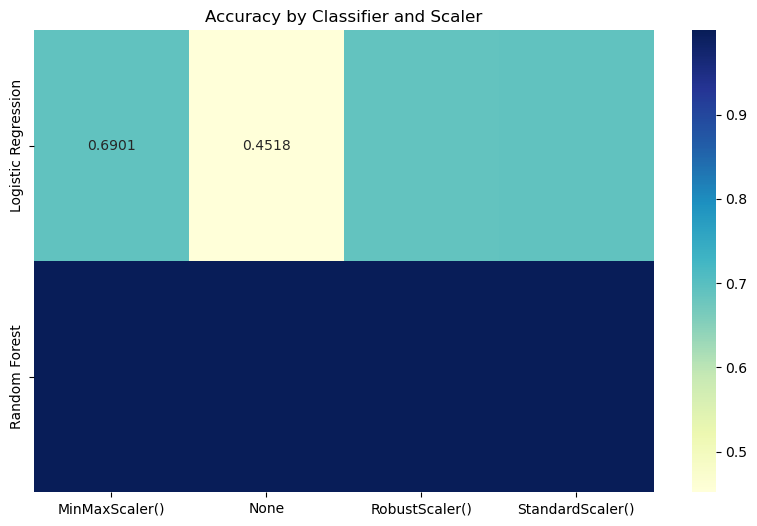

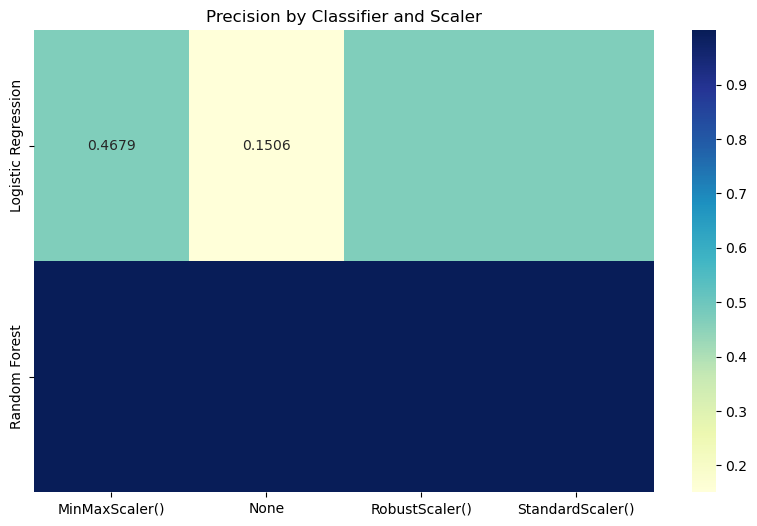

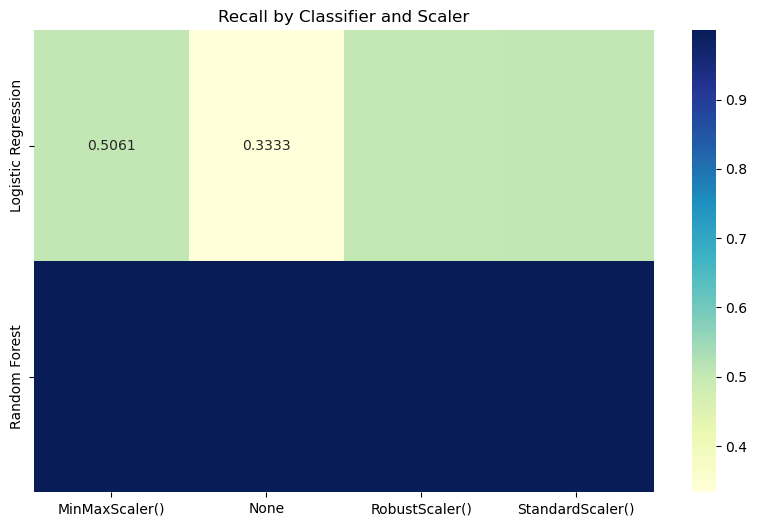

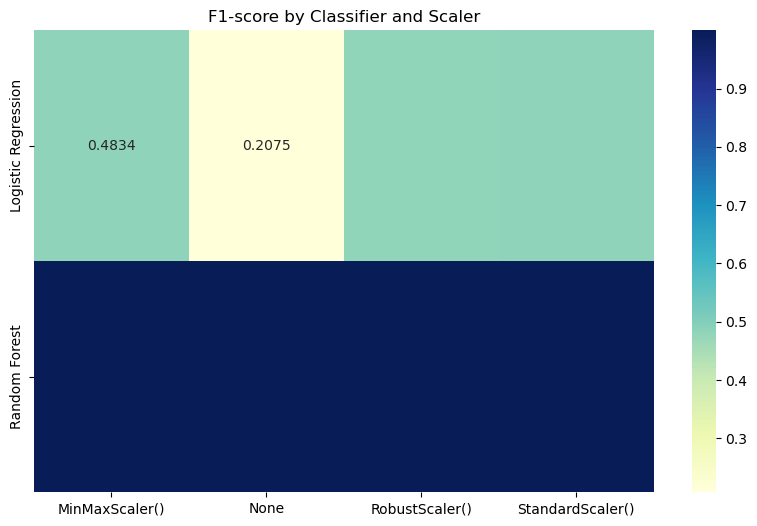

In [23]:
#Convert results to DataFrame
results_df = pd.DataFrame.from_dict({(i, j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Convert scalers to strings
results_df.index = results_df.index.map(lambda x: (x[0], str(x[1])))

# Plot accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='Accuracy', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Accuracy by Classifier and Scaler')
plt.show()

# Plot precision
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='Precision', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Precision by Classifier and Scaler')
plt.show()

# Plot recall
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='Recall', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Recall by Classifier and Scaler')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='F1-score', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('F1-score by Classifier and Scaler')
plt.show()

In [23]:
import pickle

# Check if there are any previously saved results
try:
    with open('results.pkl', 'rb') as file:
        results = pickle.load(file)
except FileNotFoundError:
    results = {}

# Modify your code to track completed combinations
completed_combinations = set(results.keys())

# Iterate over classifiers
for name, classifier in classifiers.items():
    if name not in results:
        results[name] = {}
    # Iterate over scalers
    for scaler in scalers:
        # Check if this combination has already been computed
        if (name, scaler) in completed_combinations or scaler in results[name]:
            continue
        
        # Your existing code for processing the combination goes here

        # Store the completed combination
        completed_combinations.add((name, scaler))

        # Save results after each iteration
        with open('results.pkl', 'wb') as file:
            pickle.dump(results, file)


In [24]:
classifiers = {
    'SVM': SVC(),
    #'Random Forest': RandomForestClassifier(),
    #'Logistic Regression': LogisticRegression()
}

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), None]

results = {}

#Init cross-validation 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Iterate over classifiers
for name, classifier in classifiers.items():
    results[name] = {}
    # Iterate over scalers
    for scaler in scalers:
        # Create pipeline
        if scaler is not None:
            pipeline = Pipeline([
                ('scaler', scaler),
                ('classifier', classifier) 
            ])
        else:
            pipeline = Pipeline([
                ('classifier', classifier)
            ])
            scaler = "None"
        
        # Set classifier parameter
        pipeline.set_params(classifier=classifier)
        
        # Cross-validation
        cv_scores = cross_val_score(pipeline, X, y, cv=kf)
        
        print(f"Classifier: {name}, Scaler: {scaler}")
        print("Cross-validation scores:", cv_scores)
        print("Mean training accuracy:", cv_scores.mean())
        
        # Fit the classifier on the entire training dataset
        pipeline.fit(X_train, y_train)
        
        # Evaluate the classifier on test data
        y_pred = pipeline.predict(X_test)
        accuracy = pipeline.score(X_test, y_test)
        precision, recall, f1, _ = classification_report(y_test, y_pred, output_dict=True)['macro avg'].values()
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1}")
        print()
        print()
        
        # Store results
        results[name][scaler] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
    print("---------------------")
    print()
    print()

Classifier: SVM, Scaler: MinMaxScaler()
Cross-validation scores: [0.91269414 0.91342457 0.91404928 0.91357835 0.9130113 ]
Mean training accuracy: 0.9133515300630478
Accuracy: 0.9127229740119944
Precision: 0.8838194223357179
Recall: 0.896913295272023
F1-score: 0.8894814021251468


Classifier: SVM, Scaler: StandardScaler()
Cross-validation scores: [0.91100261 0.91210787 0.91283831 0.91175227 0.911339  ]
Mean training accuracy: 0.9118080116869137
Accuracy: 0.9110218360756573
Precision: 0.8827607616789591
Recall: 0.8943015007662068
F1-score: 0.8878194289051983


Classifier: SVM, Scaler: RobustScaler()
Cross-validation scores: [0.65563009 0.65363102 0.65463056 0.65366946 0.65483239]
Mean training accuracy: 0.654478702137475


/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6556300938028602
Precision: 0.4533784762757515
Recall: 0.48064954338089166
F1-score: 0.45827995137340166


Classifier: SVM, Scaler: None
Cross-validation scores: [0.48080694 0.48290212 0.48287329 0.4808646  0.48356528]
Mean training accuracy: 0.4822024450253729
Accuracy: 0.48080693526064894
Precision: 0.33064772617371174
Recall: 0.35385251764529996
F1-score: 0.3080278753865631


---------------------




/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eltontinashe/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


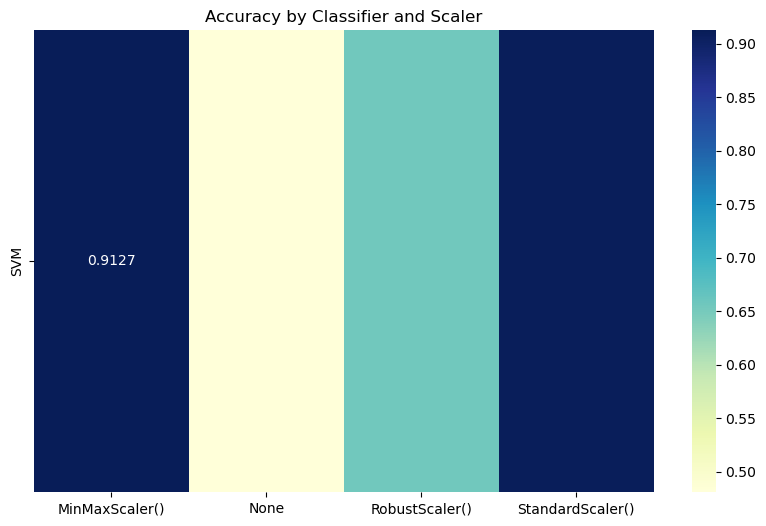

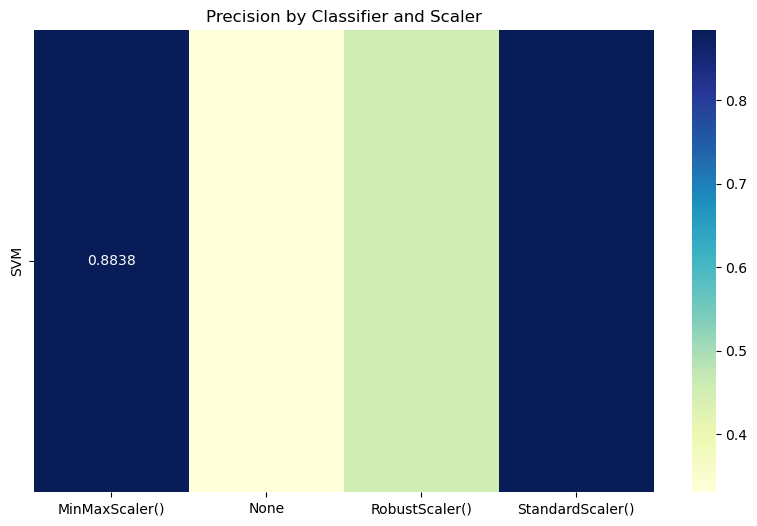

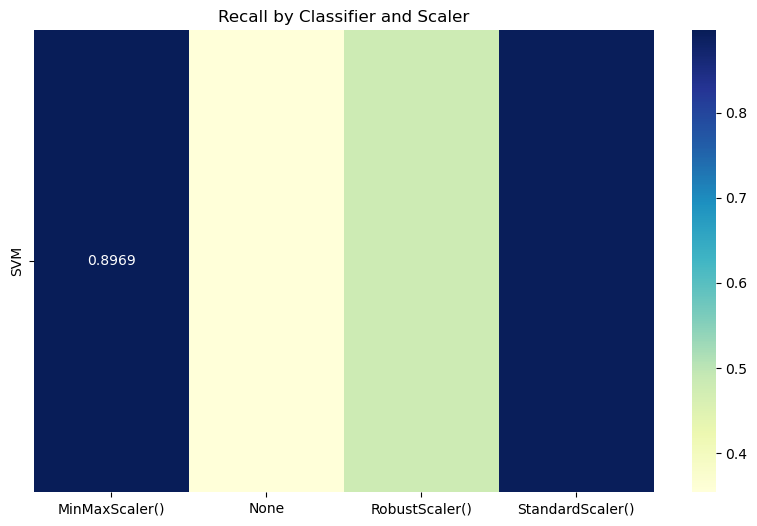

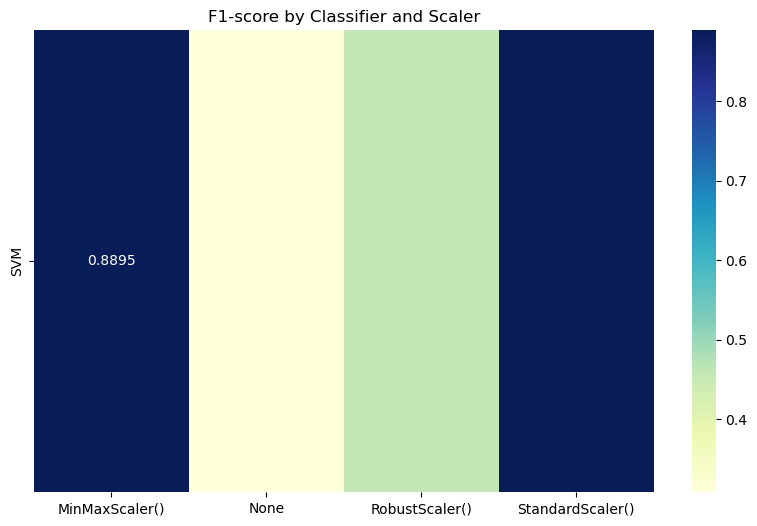

In [25]:
#Convert results to DataFrame
results_df = pd.DataFrame.from_dict({(i, j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Convert scalers to strings
results_df.index = results_df.index.map(lambda x: (x[0], str(x[1])))

# Plot accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='Accuracy', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Accuracy by Classifier and Scaler')
plt.show()

# Plot precision
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='Precision', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Precision by Classifier and Scaler')
plt.show()

# Plot recall
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='Recall', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Recall by Classifier and Scaler')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(values='F1-score', index=results_df.index.get_level_values(0), columns=results_df.index.get_level_values(1)), annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('F1-score by Classifier and Scaler')
plt.show()
